### Load required Libraries

In [5]:
from __future__ import print_function
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR) 
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

print('Successful')

Successful


### Import and Process data

In [11]:
california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv",sep=",")

In [12]:
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.3,40.6,52.0,2217.0,394.0,907.0,369.0,2.4,111400.0
16996,-124.3,40.7,36.0,2349.0,528.0,1194.0,465.0,2.5,79000.0
16997,-124.3,41.8,17.0,2677.0,531.0,1244.0,456.0,3.0,103600.0
16998,-124.3,41.8,19.0,2672.0,552.0,1298.0,478.0,2.0,85800.0


In [14]:
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14009,-122.0,37.3,25.0,2366.0,417.0,1076.0,398.0,6.9,345.9
596,-117.0,32.7,22.0,2756.0,516.0,1849.0,486.0,4.2,125.4
1533,-117.2,32.9,26.0,1352.0,202.0,654.0,217.0,5.4,260.7
13927,-122.0,37.4,28.0,2490.0,345.0,948.0,361.0,6.5,411.9
10404,-120.2,39.7,52.0,296.0,63.0,143.0,56.0,3.6,68.6
...,...,...,...,...,...,...,...,...,...
9290,-119.1,35.2,5.0,6268.0,1003.0,3269.0,980.0,5.1,118.2
12339,-121.5,38.9,32.0,1650.0,313.0,802.0,284.0,2.9,98.2
11004,-120.9,37.6,43.0,244.0,52.0,176.0,60.0,1.4,69.4
13322,-121.9,37.2,36.0,3874.0,656.0,1826.0,639.0,5.0,258.5


In [15]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


### Build First Model

In [39]:
#Define Features and Feature columns 
my_feature = california_housing_dataframe[["total_rooms"]]
feature_columns = [tf.feature_column.numeric_column("total_rooms")]


print(my_feature["total_rooms"])
print("Block with index 14009: ", my_feature["total_rooms"][14009])

14009   2366.0
596     2756.0
1533    1352.0
13927   2490.0
10404    296.0
         ...  
9290    6268.0
12339   1650.0
11004    244.0
13322   3874.0
9156    3210.0
Name: total_rooms, Length: 17000, dtype: float64
Block with index 14009:  2366.0


In [41]:
#Define Targets
targets = california_housing_dataframe["median_house_value"]

In [43]:
#Configure Linear regression model and set trainer to GradientDescentOptimizer
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0) #gradient clipping

linear_regressor = tf.estimator.LinearRegressor(
    feature_columns = feature_columns,
    optimizer = my_optimizer
)


In [48]:
#Define Input Function
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    #convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    #construct a dataset and configure batching/repeating
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
        
    #Return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels
    
    
    

In [49]:
#Train the model
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature,targets),
    steps = 100
)

In [54]:
#Evaluate the model = make predictions on the training data
    #a) Define input function for predictor
prediction_input_fn = lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)
    #b) Configure linear regressor with input function
predictions = linear_regressor.predict(
    input_fn = prediction_input_fn
)
    #c) Make predicitions
predictions = np.array([item['predictions'][0] for item in predictions])

mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)

print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data) : %0.3f" %root_mean_squared_error)

Mean Squared Error (on training data): 56367.025
Root Mean Squared Error (on training data) : 237.417


In [55]:
#Evaluate prediction by comparing RMSE to difference of target's min and max values

min_house_value = california_housing_dataframe["median_house_value"].min()
max_house_value = california_housing_dataframe["median_house_value"].max()
min_max_difference = max_house_value - min_house_value

print("Min. median house value: %0.3f" % min_house_value)
print("Max. median house value: %0.3f" % max_house_value)
print("Difference between Min. and Max. : %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. median house value: 14.999
Max. median house value: 500.001
Difference between Min. and Max. : 485.002
Root Mean Squared Error: 237.417


In [56]:
#See how closely predictions match target wrt overall summary statistics
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,17000.0,17000.0
mean,0.1,207.3
std,0.1,116.0
min,0.0,15.0
25%,0.1,119.4
50%,0.1,180.4
75%,0.2,265.0
max,1.9,500.0


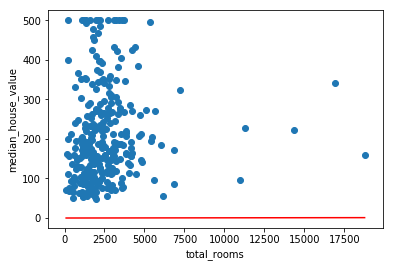

In [61]:
#Visualize the data and the learned model

sample = california_housing_dataframe.sample(n=300)

x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

y_0 = weight * x_0 + bias
y_1 = weight * x_1 + bias

plt.plot([x_0,x_1],[y_0, y_1], c='r')

plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

plt.scatter(sample["total_rooms"], sample["median_house_value"])

plt.show()
